In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Đọc file dữ liệu

In [2]:
df = pd.read_excel("Tổng hợp dữ liệu khảo sát thí sinh dự thi HSA 2023.xlsx")

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Báo cáo phản hồi của thí sinh - Bảng hỏi 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thí sinh,thang,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9
4,1,3,B,B,C,A,B,C,D,A,B
...,...,...,...,...,...,...,...,...,...,...,...
1998,1995,7,C,B,B,A,A,D,C,A,C
1999,1996,7,A,C,C,C,D,C,D,A,D
2000,1997,7,A,B,A,C,B,C,C,D,A
2001,1998,7,B,C,D,C,C,C,C,A,A


## Cleaning
    - Gán lại tên cột
    - Reset Index

In [4]:
list_column = df.iloc[3:4,1:].values
list_column = np.array(list_column).tolist()
list_column

[['thang', 'CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9']]

In [5]:
df = df.iloc[4:,1:]

In [6]:
df.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,3,B,B,C,A,B,C,D,A,B
5,3,B,B,D,B,B,C,C,A,B
6,3,B,B,D,A,A,C,C,A,C
7,3,B,B,B,B,B,C,D,D,A
8,3,B,B,C,B,B,B,A,A,D


In [7]:
# df = df.set_axis(list_column, axis=1)
df.columns = ["thang","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","CH9"]

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
df.head(5)

,thang,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9
0,3,B,B,C,A,B,C,D,A,B
1,3,B,B,D,B,B,C,C,A,B
2,3,B,B,D,A,A,C,C,A,C
3,3,B,B,B,B,B,C,D,D,A
4,3,B,B,C,B,B,B,A,A,D


### Loại bỏ giá trị ngoại lai

In [10]:
df.CH8.value_counts()

A          1257
D           403
B           237
C           101
(A,C,D)       1
Name: CH8, dtype: int64

In [11]:
df = df[(df['CH8'] != '(A,C,D)')]

In [12]:
df.CH8.value_counts()

A    1257
D     403
B     237
C     101
Name: CH8, dtype: int64

## Thống kê

In [13]:
df.shape

(1998, 10)

**Dữ liệu** gồm 1998 dữ liệu và 10 trường thông tin

In [14]:
df.keys()

Index(['thang', 'CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9'], dtype='object')

In [15]:
df.dtypes

thang    object
CH1      object
CH2      object
CH3      object
CH4      object
CH5      object
CH6      object
CH7      object
CH8      object
CH9      object
dtype: object

**Ép kiểu 'thang' sang int, các câu hỏi sang category**

In [16]:
df['thang'] = df['thang'].astype(int)
df.iloc[:,1:] = df.iloc[:,1:].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   thang   1998 non-null   int32   
 1   CH1     1998 non-null   category
 2   CH2     1998 non-null   category
 3   CH3     1998 non-null   category
 4   CH4     1998 non-null   category
 5   CH5     1998 non-null   category
 6   CH6     1998 non-null   category
 7   CH7     1998 non-null   category
 8   CH8     1998 non-null   category
 9   CH9     1998 non-null   category
dtypes: category(9), int32(1)
memory usage: 42.8 KB


## Visualization

Hàm vẽ count chart

In [18]:
def countchart(x,label):
    if type(df[x]) == 'category':
        sns.countplot(data=df,x=x, order=["A","B","C","D"], 
                      palette = ['gold', 'blue', 'lightgreen', 'coral'])
#         plt.xticks(['A','B','C','D'],label)
    else:
        sns.countplot(data=df,x=x)

Hàm vẽ biểu đồ pie chart

In [19]:
def piechart(x, label):
#     tong=df.groupby(x).sum().reset_index()tong.keys()
    labels=label
    tong = df[x].value_counts().sort_index(ascending=True)
    fig, ax = plt.subplots()
    ax.pie(tong.values, labels = label, startangle=90,
       colors = ['gold', 'blue', 'lightgreen', 'coral'],
       autopct='%1.1f%%', explode = [0,0,0,0.1]) #using explode to highlight the lowest
    ax.set_aspect('equal')  #Ensure pie is drawn as a circle
#     ax.legend()

Hàm vẽ biểu đồ pie chart theo tháng

In [20]:
def piechart_month(x, label, month):
#     tong=df.groupby(x).sum().reset_index()tong.keys()
    tong = df[(df['thang'] == month)][x].value_counts().sort_index(ascending=True)
    fig, ax = plt.subplots()
    ax.pie(tong.values, labels = label, startangle=90,
       colors = ['gold', 'blue', 'lightgreen', 'coral'],
       autopct='%1.1f%%', explode = [0,0,0,0.1]) #using explode to highlight the lowest
    ax.set_aspect('equal')  #Ensure pie is drawn as a circle
#     ax.legend()

### Thời gian thí sinh chủ yếu lựa chọn tham gia kì đánh giá

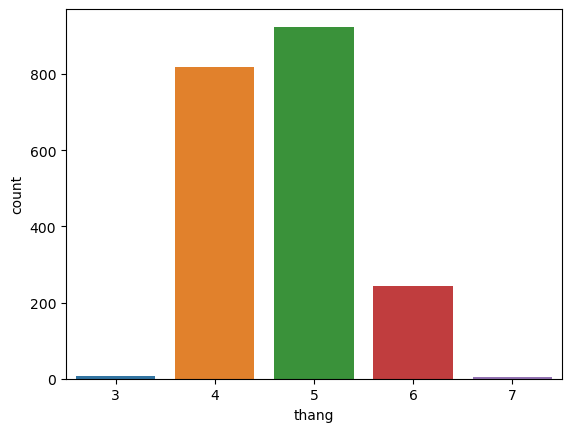

In [220]:
countchart('thang',labels)

**Đánh giá:** Thí sinh tập trung tham gia kì thi vào tháng 4, 5, 6, tháng  6 có số lượng thí sinh ít hơn đáng kể so với tháng 4,5

### Đánh giá mức độ kì thi

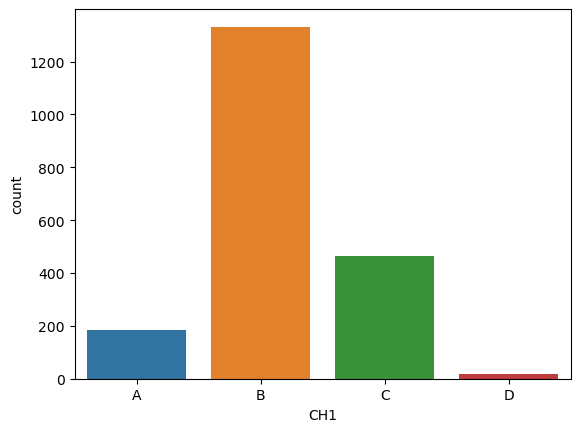

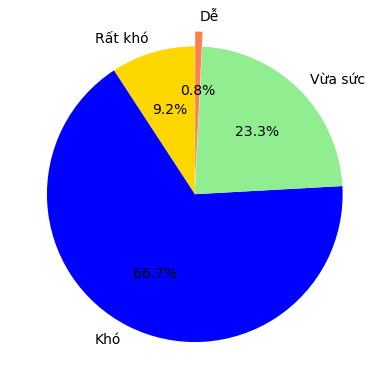

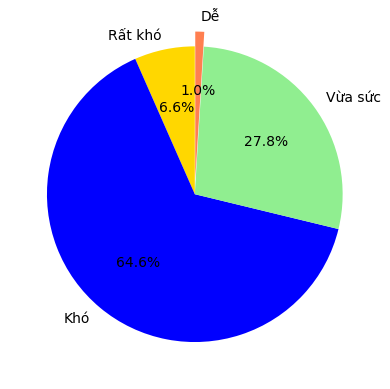

In [22]:
labels = ["Rất khó", "Khó", "Vừa sức", "Dễ"]
countchart('CH1',labels)
piechart("CH1",labels)
piechart_month("CH1",labels, 5)

**Đánh giá:** Các thí sinh tham gia kì thi nhận thấy mức độ đề thi Khó, lượng khảo sát mức độ đề thi khó lớn hơn tổng mức đồ đề thi rất khó, vừa phải, dễ cộng lại

### Mức độ lượng kiến thức ở kì thi so với chương trình khung THPT

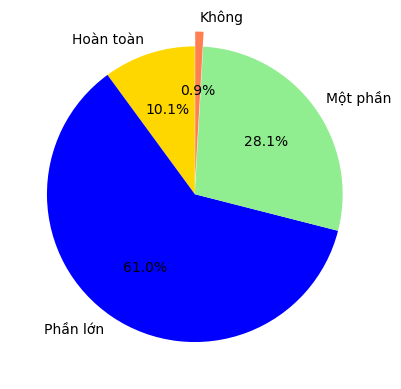

In [222]:
# countchart('CH2')
piechart('CH2',['Hoàn toàn', 'Phần lớn', 'Một phần','Không'])

**Đánh giá:** Theo khảo sát thì kiến thức đề thi năm chủ yếu trong chương trình khung THPT

### Đánh giá mức độ khó của đề thi

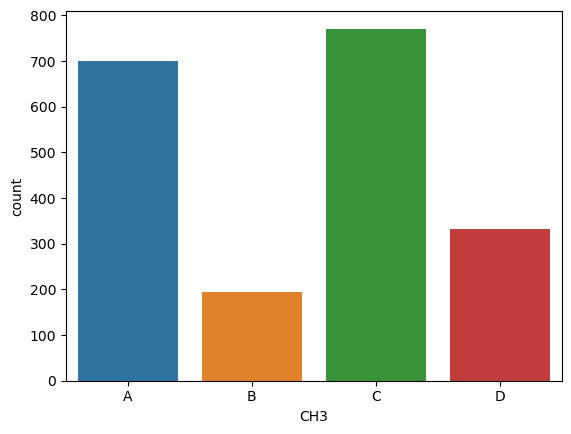

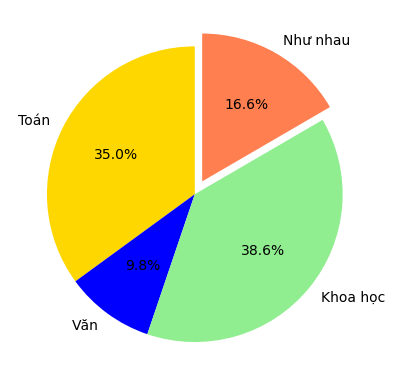

In [223]:
labels=["Toán","Văn", "Khoa học","Như nhau"]
countchart("CH3",labels)
piechart("CH3",labels)

**Đánh giá:** Theo đánh giá của thí sinh thì mức độ khó của đề thi tập trung ở hai môn là: Toán và Khoa học

### Tự đánh giá năng lực 

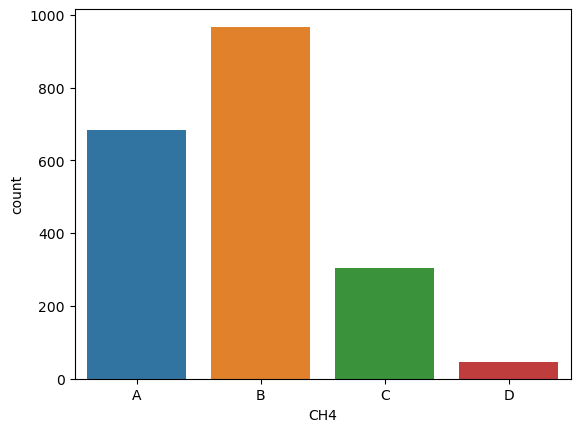

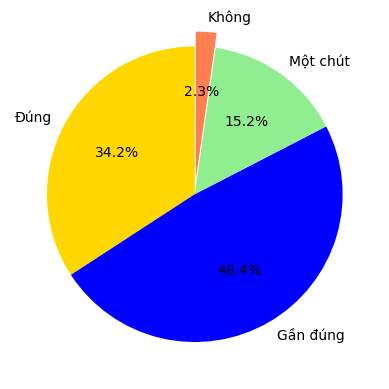

In [224]:
labels=["Đúng","Gần đúng", "Một chút","Không"]
countchart("CH4",labels)
piechart("CH4",labels)

**Đánh giá:** Mức độ phản ánh của đề thi khá sát với năng lực của thí sinh khi

### Mức độ hài lòng về công tác tổ chức

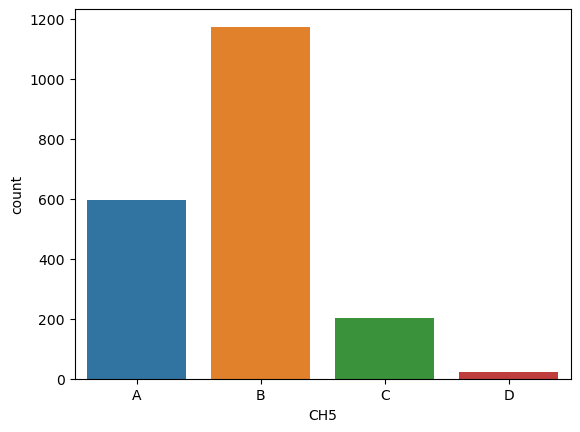

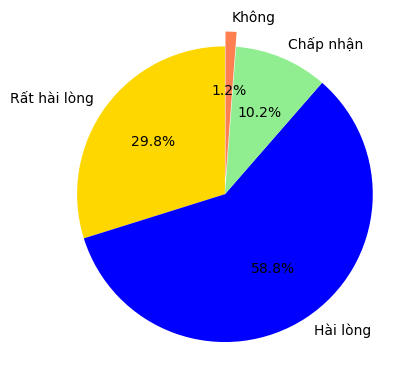

In [225]:
labels=["Rất hài lòng", "Hài lòng","Chấp nhận","Không"]
countchart("CH5", labels)
piechart("CH5",labels)

**Đánh giá:** Công tác chuẩn bị đầy đủ, thí sinh hài lòng về ban tổ chức kì thi

### Tiếp cận thi hình thức trên máy tính

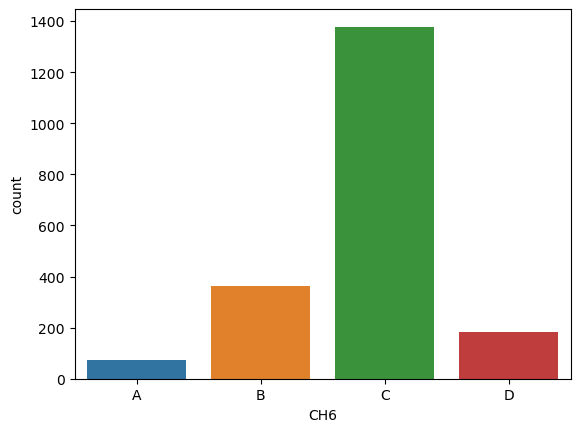

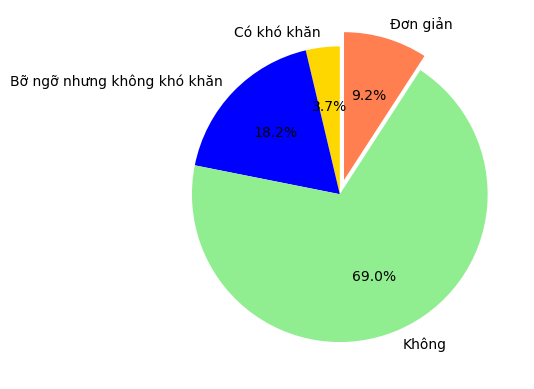

In [226]:
labels = ["Có khó khăn", "Bỡ ngỡ nhưng không khó khăn", "Không", "Đơn giản"]
countchart("CH6",labels)
piechart("CH6",labels)

**Đánh giá:** Về hình thức thi trên máy tính thì thí sinh không gặp nhiều khó khăn trong việc sử dụng trả lời các câu hỏi, vẫn còn một ít số thí sinh hơi bỡ ngỡ trong việc sử dụng hình thức thi này

### Mức độ hài lòng về kết quả thi

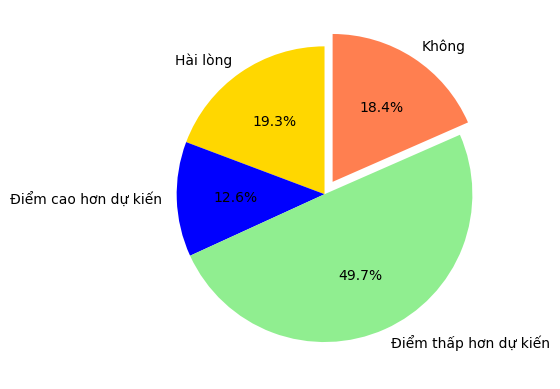

In [247]:
labels = ["Hài lòng", "Điểm cao hơn dự kiến", "Điểm thấp hơn dự kiến","Không"]
# countchart("CH7",labels)
piechart("CH7",labels)

**Đánh giá:** Do sự đánh giá mức độ khó của đề thi nên kết quả của các thí sinh vẫn chưa được mong đợi và phần lớn là thấp hơn kì vọng

### Chuẩn bị cho kì thi

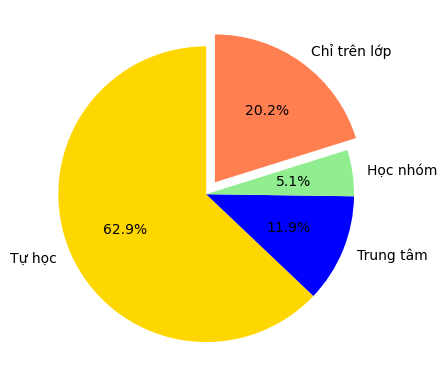

In [266]:
labels = ["Tự học", "Trung tâm","Học nhóm","Chỉ trên lớp"]
# countchart('CH8',labels)
piechart('CH8',labels)

**Đánh giá:** Lượng thí sinh tự học trong kì thi cao, tỷ lệ học sinh tham gia học nhóm và trung tâm thấp cho thấy thí sinh có sự chuẩn bị tốt

### Mong muốn số lần tham gia dự thi

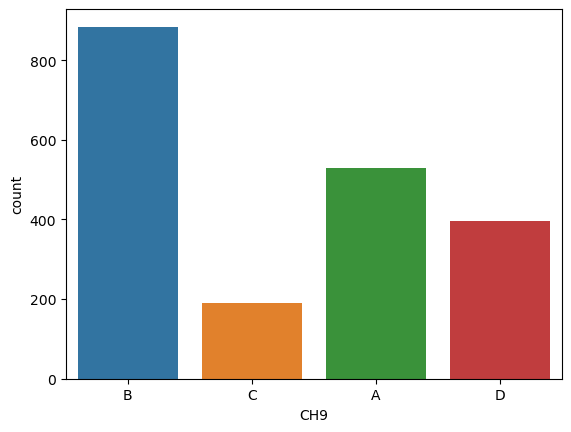

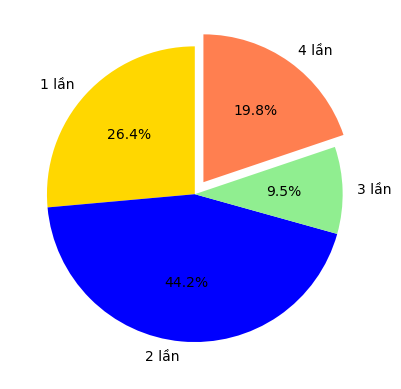

In [267]:
labels = ['1 lần', '2 lần', '3 lần','4 lần']
countchart('CH9',labels)
piechart('CH9',labels)

**Đánh giá:** Lượng thí sinh mong muốn tiếp tục tham gia kì thi cao

In [254]:
df.CH9.value_counts()

B    884
A    528
D    396
C    190
Name: CH9, dtype: int64

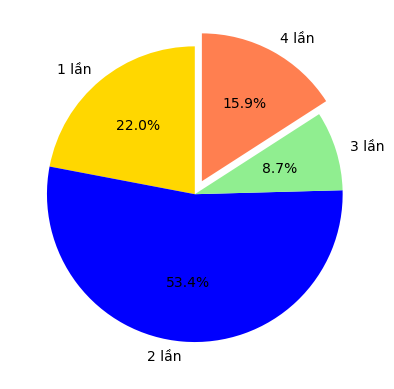

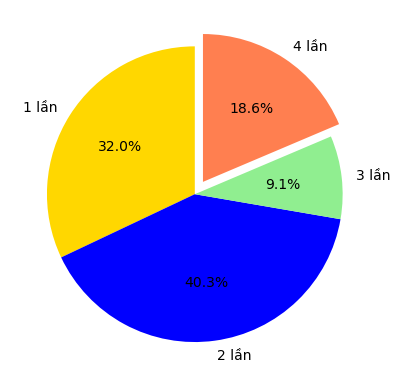

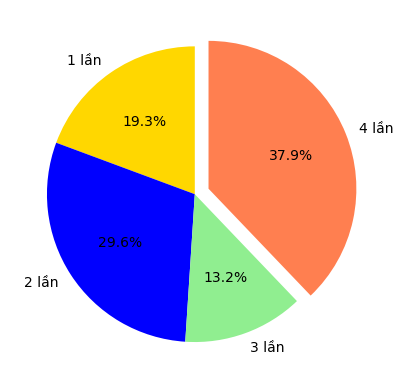

In [23]:
labels = ['1 lần', '2 lần', '3 lần','4 lần']
piechart_month('CH9',labels,4)
piechart_month('CH9',labels,5)
piechart_month('CH9',labels,6)